In [15]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt



# Import supplementary visualizations code visuals.py
#import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
df = pd.read_csv('monthly_gold.csv')
prices = df['Price']
features = df.drop('Price', axis = 1)
    
# Success
print("Gold  dataset has {} data points with {} variables each.".format(*df.shape))


Gold  dataset has 847 data points with 2 variables each.


In [8]:
# TODO: Minimum price of the data
minimum_price = np.min(prices)

# TODO: Maximum price of the data
maximum_price = np.max(prices)

# TODO: Mean price of the data
mean_price = np.mean(prices)

# TODO: Median price of the data
median_price = np.median(prices)

# TODO: Standard deviation of prices of the data
std_price = np.std(prices)

# Show the calculated statistics
print("Statistics for Gold  dataset:\n")
print("Minimum price: ${:,.2f}".format(minimum_price))
print("Maximum price: ${:,.2f}".format(maximum_price))
print("Mean price: ${:,.2f}".format(mean_price))
print("Median price ${:,.2f}".format(median_price))
print("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Gold  dataset:

Minimum price: $34.49
Maximum price: $1,840.81
Mean price: $416.56
Median price $319.62
Standard deviation of prices: $453.40


In [9]:
df

,Date,Price
0,1950.01,34.730
1,1950.02,34.730
2,1950.03,34.730
3,1950.04,34.730
4,1950.05,34.730
...,...,...
842,2020.03,1593.764
843,2020.04,1680.030
844,2020.05,1715.697
845,2020.06,1734.032


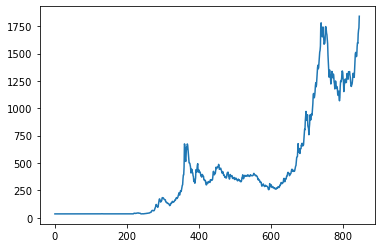

In [10]:
plt.plot(df['Price'])

In [11]:
future_years = 20
df['Prediction'] = df[['Price']].shift(-future_years)

In [12]:
#Target Data

X = np.array(df.drop(['Prediction'], 1))[:-future_years]
print(X)


[[1950.01    34.73 ]
 [1950.02    34.73 ]
 [1950.03    34.73 ]
 ...
 [2018.09  1199.198]
 [2018.1   1214.726]
 [2018.11  1221.275]]


In [13]:
#Estimator

y = np.array(df['Prediction'])[:-future_years]
print(y)

[  34.71    34.71    34.73    34.66    34.49    34.49    34.68    34.82
   34.73    34.53    34.57    34.58    34.51    34.63    34.72    34.79
   34.88    34.95    34.92    34.93    34.9     34.89    34.91    34.91
   34.76    34.79    34.86    34.85    34.86    34.88    34.92    35.04
   35.08    35.07    35.08    35.05    35.08    35.08    35.06    35.04
   35.04    35.05    35.06    35.05    35.05    35.04    35.05    35.03
   34.98    34.98    34.98    34.97    34.99    34.99    34.99    34.98
   34.99    34.98    35.      35.02    35.01    35.02    34.98    34.9
   34.88    34.89    34.91    34.92    34.93    34.99    34.99    34.97
   34.96    34.97    34.97    34.99    35.01    35.08    35.09    35.1
   35.11    35.1     35.11    35.1     35.1     35.11    35.1     35.09
   35.07    35.06    35.06    35.08    35.12    35.12    35.13    35.12
   35.13    35.1     35.06    35.05    35.09    35.09    35.09    35.11
   35.1     35.09    35.1     35.13    35.22    35.78    35.82    

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [17]:
#Create the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#Create the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [26]:
x_future = df[:-future_years]
x_future = x_future.tail(future_years) 
#Convert the data set into a numpy array
x_future = np.array(x_future)
x_future

array([[2017.04 , 1267.15 ],
       [2017.05 , 1245.25 ],
       [2017.06 , 1261.277],
       [2017.07 , 1235.1  ],
       [2017.08 , 1281.72 ],
       [2017.09 , 1317.045],
       [2017.1  , 1280.677],
       [2017.11 , 1283.189],
       [2017.12 , 1265.674],
       [2018.01 , 1332.809],
       [2018.02 , 1333.775],
       [2018.03 , 1325.562],
       [2018.04 , 1335.332],
       [2018.05 , 1303.618],
       [2018.06 , 1282.126],
       [2018.07 , 1238.064],
       [2018.08 , 1201.859],
       [2018.09 , 1199.198],
       [2018.1  , 1214.726],
       [2018.11 , 1221.275]])

In [27]:
tree_prediction = tree.predict(x_future)
print(tree_prediction)


[1249.887 1291.63  1319.755 1302.286 1287.65  1282.46  1358.488 1414.611
 1497.102 1510.336 1494.765 1510.336 1480.025 1560.668 1598.818 1680.03
 1680.03  1715.697 1680.03  1840.807]


In [28]:
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[1317.02484448 1297.94722626 1311.97392891 1289.16316068 1329.89275278
 1360.76358188 1329.05766946 1331.28789739 1316.03769624 1377.98651506
 1378.86732754 1371.73631305 1380.30163632 1352.65793576 1333.93643754
 1295.51487018 1263.95123119 1261.66624169 1275.25739562 1281.01129121]


<ipython-input-33-a9b08225229c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices


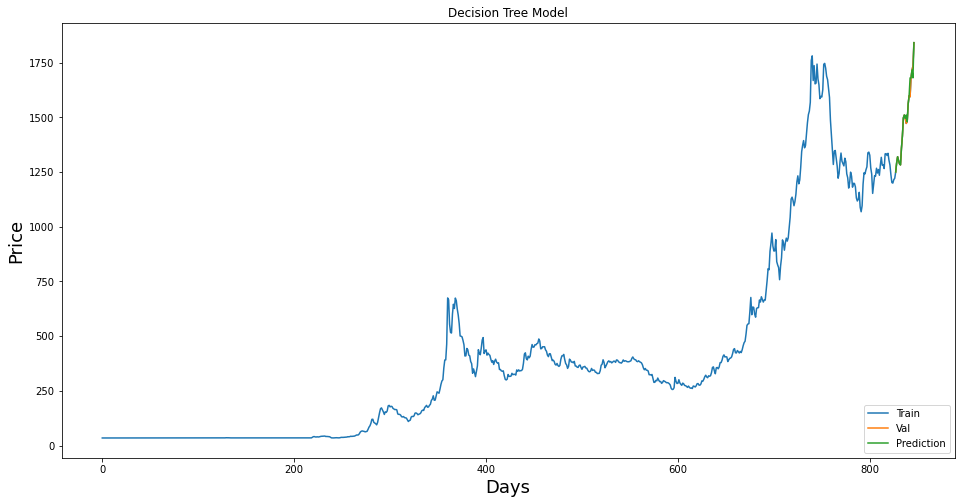

In [33]:
predictions = tree_prediction
#Plot the data
valid =  df[X.shape[0]:]
valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices
plt.figure(figsize=(16,8))
plt.title('Decision Tree Model')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.plot(df['Price'])
plt.plot(valid[['Price','Predictions']])
plt.legend(['Train', 'Val', 'Prediction' ], loc='lower right')
plt.show()

<ipython-input-34-a70f94e5315a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices


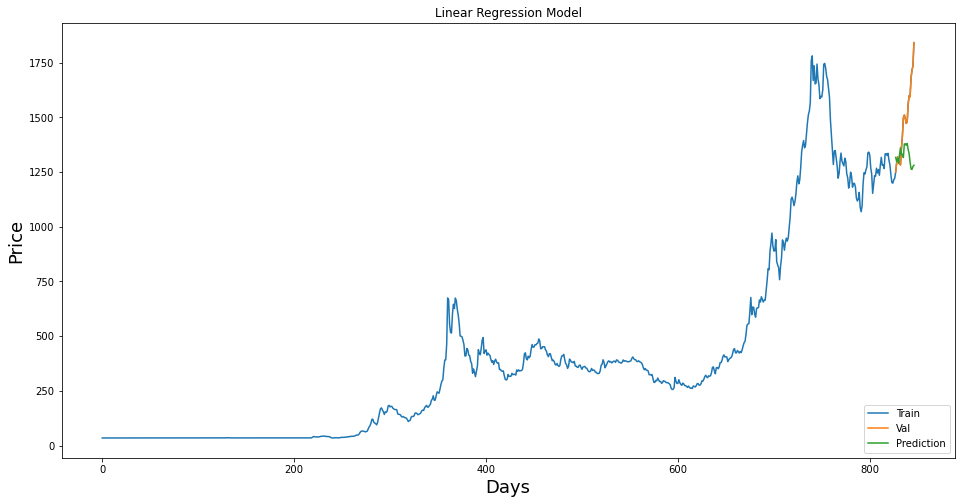

In [34]:
#Visualize the data
predictions = lr_prediction
#Plot the data
valid =  df[X.shape[0]:]
valid['Predictions'] = predictions #Create a new column called 'Predictions' that will hold the predicted prices
plt.figure(figsize=(16,8))
plt.title('Linear Regression Model')
plt.xlabel('Days',fontsize=18)
plt.ylabel('Price',fontsize=18)
plt.plot(df['Price'])
plt.plot(valid[['Price','Predictions']])
plt.legend(['Train', 'Val', 'Prediction' ], loc='lower right')
plt.show()